# Wave data analysis

In [73]:
%matplotlib inline
#function H = get_wave_data;
#
# the address to the buoy data (should pass in as argument)
# 46053 = E. Santa Barbara
# 46054 = W. Santa Barbara
# 46217 = Anacapa Passage
# 46086 = San Clemente Basin
# 46219 = San Nicolas Island
filename = '46053' # the buoy name
url = 'https://www.ndbc.noaa.gov/data/realtime2/{}.data_spec'.format(filename)
dest = './{}.data_spec'.format(filename)
from urllib.request import urlretrieve
#urlretrieve(url, dest)


### Read the file into 3 lists
Skipping the first 3 header lines

In [74]:
import matplotlib.pyplot as plt
import numpy as np
filename = '46053' # the buoy name
dest = './{}.data_spec'.format(filename)

dates = []
energies = []
frequencies = []

with open(dest) as fp:
    for _ in range(3):
        next(fp)
    
    for l in fp:

        dates.append(l.split()[0:5])
        # separation_frequency = l.split()[5] # this value is ignored
        
        # [E] get wave energy data as E (meters squared per second)
        energies.append([float(e) for e in l.split()[6::2]])

        # [f] get frequency data as collection (1/seconds) measure of cycles per second
        freqs=l.split()[7::2]
        frequencies.append([float(i[1:-1]) for i in freqs])

    fp.close()
print("{}\t{}\t{}".format(len(dates), len(energies), len(frequencies)))

1085	1085	1085


### convert the lists to numpy arrays

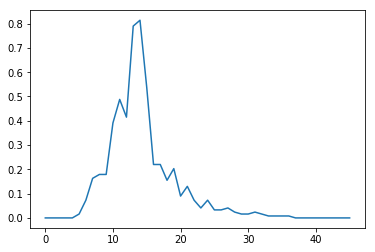

In [75]:
E = np.array(energies)    # E for 'Energy'
f = np.array(frequencies) # f for 'frequency'
plt.plot(E[3,:])

In [76]:
df = np.diff(f)
#plt.plot(df) # numpy differentiation is harsh
df[1:2,:] # slice of one row

array([[0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005,
        0.005, 0.005, 0.005, 0.007, 0.01 , 0.01 , 0.01 , 0.01 , 0.01 ,
        0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 ,
        0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 ,
        0.01 , 0.01 , 0.015, 0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.02 ]])

In [77]:
# compare this element with the one next to it, along the 2nd dimension
import pandas as pd
dfN = pd.DataFrame(df)
#dfN

In [78]:
freq = pd.DataFrame(f)

df = freq.diff(axis=1,periods=1)
print(type(df))
df.iloc[[1,2,3]]
#plt.plot(df[29]) # pandas differentiation has curves

<class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
1,NaN,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,...,0.01,0.01,0.01,0.015,0.02,0.02,0.02,0.02,0.02,0.02
2,NaN,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,...,0.01,0.01,0.01,0.015,0.02,0.02,0.02,0.02,0.02,0.02
3,NaN,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,...,0.01,0.01,0.01,0.015,0.02,0.02,0.02,0.02,0.02,0.02


In [79]:
#np.mean(f, axis=0)

# Emid = .5*(E(:,1:N-1)+E(:,2:N));
#Emid = np.zeros(len(E))
#for i in range(1,len(E)):
#    Emid[i-1] = .5*(E[i-1] + E[i])
#
#print("Emid is a {} with len:{}".format(type(Emid),len(Emid)))
#plt.plot(Emid)
# fmid = .5*(f(:,1:N-1)+f(:,2:N));

In [18]:
#fmid = np.zeros(len(f))
#for i in range(1,len(f)):
#    fmid[i-1] = .5*(f[i-1] + f[i])
#
#print("fmid is a {} with len:{}".format(type(fmid),len(fmid)))
#plt.plot(fmid)

In [19]:
#SWH = 4*sqrt(sum(df.*Emid,2));

---

### Open the file as a Pandas Series:

In [2]:
import pandas as pd
dates = pd.read_csv(dest, sep='\s+', header=None, skiprows=[0], usecols=[i for i in range(5)])
data = pd.read_csv(dest, sep='\s+', header=None, skiprows=[0], usecols=[i for i in range(5,98)])
dates.head()


NameError: name 'dest' is not defined

In [3]:
data['#YY'][3]

NameError: name 'data' is not defined

In [4]:
type(data)

NameError: name 'data' is not defined

In [123]:
data.head()

,5,6,7,8,9,10,11,12,13,14,...,88,89,90,91,92,93,94,95,96,97
0,0.087,0.0,(0.033),0.0,(0.038),0.0,(0.043),0.158,(0.048),0.316,...,0.0,(0.405),0.0,(0.425),0.0,(0.445),0.0,(0.465),0.0,(0.485)
1,0.098,0.0,(0.033),0.0,(0.038),0.0,(0.043),0.000,(0.048),0.000,...,0.0,(0.405),0.0,(0.425),0.0,(0.445),0.0,(0.465),0.0,(0.485)
2,0.113,0.0,(0.033),0.0,(0.038),0.0,(0.043),0.000,(0.048),0.094,...,0.0,(0.405),0.0,(0.425),0.0,(0.445),0.0,(0.465),0.0,(0.485)
3,0.090,0.0,(0.033),0.0,(0.038),0.0,(0.043),0.000,(0.048),0.000,...,0.0,(0.405),0.0,(0.425),0.0,(0.445),0.0,(0.465),0.0,(0.485)
4,0.098,0.0,(0.033),0.0,(0.038),0.0,(0.043),0.183,(0.048),0.274,...,0.0,(0.405),0.0,(0.425),0.0,(0.445),0.0,(0.465),0.0,(0.485)


In [81]:


# [Emid] calculate the Energy mid-point
# [fmid] calculate the frequency mid-point
# [SWF] Significant wave height integrating across the entire range of frequencies
  # as a function of wave periods
# [p] define the arbitrary period second intervals

p = [0,5,7,9,11,13,15,17,19,21,35]

# [Pmid] calculate the mid-point (between frequencies) Making plots nicer.
# [pf] shift the focus from frequencies to periods
# [SWHmid] # integrate the calculations: 4* sqrt(sum(df*Emid))

# PLOT the results